# Tweeter Sentiment Analysis Model

In [ ]:
%load_ext lab_black
import sys

sys.path.append("..")
from src.data.twitter_dataset import TwitterDataset
from src.main import analyze_twitter_sentiment_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from src.config.config import MODEL_MAPPING
from src.features.twitter_features import TweetPreprocessor
from src.models.predict_twitter_sentiment import build_tweet_sentiment_model
from src.visualization.visualize import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
from src.config.config import MODEL_PARAMS_SPACE
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit

In [ ]:
X, y = TwitterDataset().build_training_test_set()

In [3]:
X

,tweet_id,entity,tweet_content
0,2401,Borderlands,im getting on borderlands and i will murder yo...
1,2401,Borderlands,I am coming to the borders and I will kill you...
6,2402,Borderlands,So I spent a few hours making something for fu...
7,2402,Borderlands,So I spent a couple of hours doing something f...
18,2404,Borderlands,that was the first borderlands session in a lo...
...,...,...,...
74665,9198,Nvidia,Nvidia really delayed the 3070 by 2 weeks.
74670,9199,Nvidia,Let no elim go unnoticed. . . . NVIDIA Highlig...
74671,9199,Nvidia,t let Elim go unnoticed.... NVIDIA Highlights ...
74676,9200,Nvidia,Just realized the windows partition of my Mac ...


In [5]:
tm = build_tweet_sentiment_model("Decision Tree", {"ccp_alpha": 0.0})

In [6]:
tm.fit(X, y)

Pipeline(steps=[('tweet_preprocessor',
                 TweetPreprocessor(tweets_col='tweet_content')),
                ('vec', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

<module 'matplotlib.pyplot' from '/Users/chen_bowen/miniforge3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

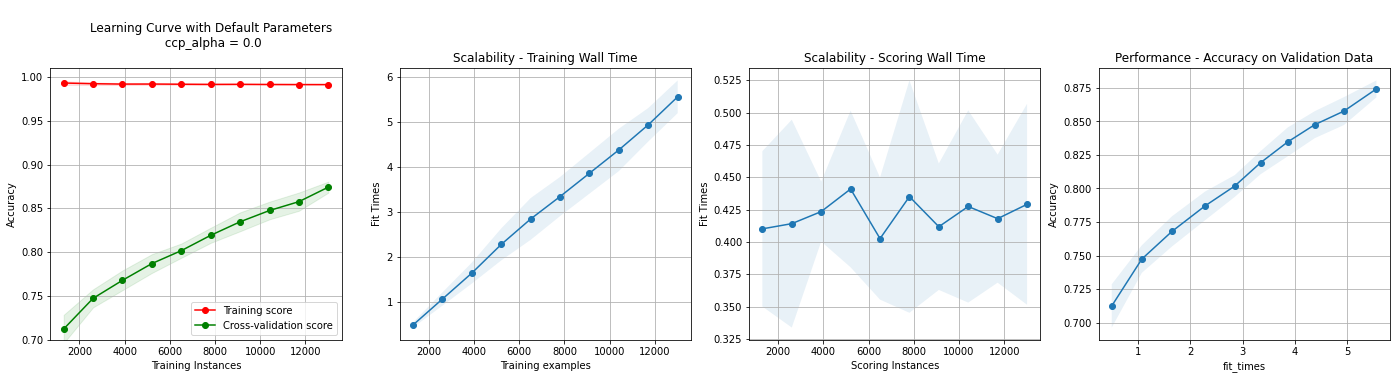

In [12]:
cv = ShuffleSplit(n_splits=20, test_size=0.1, random_state=7)
plot_learning_curve(
    "Decision Tree",
    "Default",
    0.0,
    tm,
    X,
    y,
    # axes=axes[:, 0],  # type: ignore
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
)

In [14]:
params_search = RandomizedSearchCV(
    tm,
    MODEL_PARAMS_SPACE["Decision Tree"],
    n_iter=100,
    cv=5,
    random_state=7,
)
tuned_model = params_search.fit(X, y)

KeyboardInterrupt: 